<a href="https://colab.research.google.com/github/Raksantos/KDD-Exercise/blob/main/Atividade_KDD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt

#KNN

##Base de Dados

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/Raksantos/KDD-Exercise/main/iris.data')
df.head()

,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   sepal length in cm  150 non-null    float64
 1   sepal width in cm   150 non-null    float64
 2   petal length in cm  150 non-null    float64
 3   petal width in cm   150 non-null    float64
 4   class               150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


##Pré-processamento

###Trocando o nome das classes para números

In [ ]:
#Renomeando usando laço de repetição
# classes = df['class']

# for index, item in classes.iteritems():
#   if classes[index] == 'Iris-setosa':
#     classes[index] = 0
#   elif classes[index] == 'Iris-versicolor':
#     classes[index] = 1
#   elif classes[index] == 'Iris-virginica':
#     classes[index] = 2

# df['class'] = classes
# df['class'].value_counts()

In [ ]:
#Renomeando usando pandas
df['class'].replace({'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}, inplace=True)

df['class'].value_counts()

0    50
1    50
2    50
Name: class, dtype: int64

###Normalizando os dados com o MiniMax Scaler

In [ ]:
def normalization(df):
  numeric_columns = df.select_dtypes('number').columns

  for column in numeric_columns:
    data_column = df[column]

    min_value = min(data_column)
    max_value = max(data_column)

    for index, row in data_column.iteritems():
      data_column[index] = (row - min_value)/(max_value - min_value)

In [ ]:
#Removendo classes alvos
labels = df['class']
df_copy = df.drop(['class'], axis=1)

In [ ]:
normalization(df_copy)
df = df_copy

df['class'] = labels
df.head()

,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm,class
0,0.222222,0.625000,0.067797,0.041667,0
1,0.166667,0.416667,0.067797,0.041667,0
2,0.111111,0.500000,0.050847,0.041667,0
3,0.083333,0.458333,0.084746,0.041667,0
4,0.194444,0.666667,0.067797,0.041667,0


###Dividindo o dataset em treino e teste

In [ ]:
def train_test_split(X, y, test_size=0.3, seed=1234):
  np.random.seed(seed)
  split = np.random.rand(X.shape[0]) < (1 - test_size)

  X_train = X[split]
  y_train = y[split]
  X_test =  X[~split]
  y_test = y[~split]

  return X_train.to_numpy(), y_train.to_numpy(), X_test.to_numpy(), y_test.to_numpy()

In [ ]:
X = df.drop(['class'], axis=1)
y = df['class']
X_train, y_train, X_test, y_test = train_test_split(X, y)

##Modelo

In [ ]:
class KNN:
  def _euclidean_distance(self, x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

  def __init__(self, k=3):
    self.k = k

  def fit(self, X, y):
    self.X_train = X
    self.y_train = y

  def predict(self, X):
    y_predicted = [self._predict(x) for x in X]
    return np.array(y_predicted)

  def _predict(self, x):
    distances = [self._euclidean_distance(x, x_train) for x_train in self.X_train]
    
    k_indices = np.argsort(distances)[: self.k]
    
    k_nearest_labels = [self.y_train[i] for i in k_indices]
    
    most_commom = Counter(k_nearest_labels).most_common(1)
    return most_commom[0][0]

In [ ]:
model = KNN(3)
model.fit(X_train, y_train)
predictions = model.predict(X_test)

##Métricas

###Acurácia do modelo

In [ ]:
acuracy = np.sum(predictions == y_test) / len(y_test)
acuracy

0.9574468085106383

###Matriz de confusão

In [ ]:
confusion_matrix = {0: {0: 0, 1: 0, 2: 0}, 1: {0: 0, 1: 0, 2: 0}, 2: {0: 0, 1: 0, 2: 0}}

predictions_copy = pd.Series(predictions)
y_test_copy = pd.Series(y_test)

for index, item in predictions_copy.iteritems():
  confusion_matrix[y_test_copy[index]][predictions_copy[index]] += 1

confusion_matrix

{0: {0: 16, 1: 0, 2: 0}, 1: {0: 0, 1: 13, 2: 1}, 2: {0: 0, 1: 1, 2: 16}}

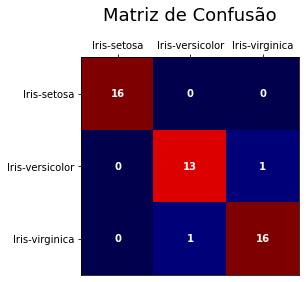

In [ ]:
real_0 = list(confusion_matrix[0].values())
real_1 = list(confusion_matrix[1].values())
real_2 = list(confusion_matrix[2].values())

matrix = [real_0, real_1, real_2]

col = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
row = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

fig, ax = plt.subplots()
im = ax.imshow(matrix, cmap=plt.cm.seismic)

ax.set_yticks(np.arange(len(col)))
ax.set_xticklabels(col)
ax.set_xticks(np.arange(len(row)))
ax.set_yticklabels(row)

ax.xaxis.tick_top()

for i in range(len(col)):
    for j in range(len(row)):
        text = ax.text(j, i, matrix[i][j], ha="center", va="center", color="w", fontweight=800)

ax.set_title("Matriz de Confusão", fontsize=18, pad=20)
plt.show()

##Acurácia, Complemento, Precisão e Cobertura

In [ ]:
acuracies= [round((confusion_matrix[0][0]/len(predictions)), 2), 
            round((confusion_matrix[1][1]/len(predictions)), 2), round((confusion_matrix[2][2]/len(predictions)), 2)]

complement = [round(1 - acuracies[0], 2), round(1 - acuracies[1], 2), round(1 - acuracies[2], 2)]



precision = [
          round((confusion_matrix[0][0]/(confusion_matrix[0][0] + confusion_matrix[0][1] + confusion_matrix[0][2])), 2), 
          round((confusion_matrix[1][1]/(confusion_matrix[1][1] + confusion_matrix[1][0] + confusion_matrix[1][2])), 2), 
          round((confusion_matrix[2][2]/(confusion_matrix[2][2] + confusion_matrix[2][0] + confusion_matrix[2][1])), 2)]

recall = [round((confusion_matrix[0][0]/(confusion_matrix[0][0] +  confusion_matrix[1][0] +  confusion_matrix[2][0])), 2), 
          round((confusion_matrix[1][1]/(confusion_matrix[1][1] +  confusion_matrix[0][1] +  confusion_matrix[2][1])), 2), 
          round((confusion_matrix[2][2]/(confusion_matrix[2][2] +  confusion_matrix[0][2] +  confusion_matrix[1][2])), 2)]

In [ ]:
metrics = pd.DataFrame({'Acuraccy': acuracies, 
                        'Complement': complement, 'Precision': precision, 'Recall': recall}, index=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'])
metrics

,Acuraccy,Complement,Precision,Recall
Iris-setosa,0.34,0.66,1.00,1.00
Iris-versicolor,0.28,0.72,0.93,0.93
Iris-virginica,0.34,0.66,0.94,0.94


#Árvore de Decisão

##Base de dados e pré-processamento

In [ ]:
df = pd.read_csv('https://gist.githubusercontent.com/guilhermesilveira/4d1d4a16ccbf6ea4e0a64a38a24ec884/raw/afd05cb0c796d18f3f5a6537053ded308ba94bf7/car-prices.csv')
df.head()

,Unnamed: 0,mileage_per_year,model_year,price,sold
0,0,21801,2000,30941.02,yes
1,1,7843,1998,40557.96,yes
2,2,7109,2006,89627.50,no
3,3,26823,2015,95276.14,no
4,4,7935,2014,117384.68,yes


###Renomeando e retirando uma coluna desnecessária

In [ ]:
mapa = {
    "mileage_per_year": "milhas_por_ano",
    "model_year": "ano_do_modelo",
    "price": "preco",
    "sold": "vendido"
}

df = df.rename(columns=mapa);
a_trocar = {
    "no": 0,
    "yes": 1
}

df.vendido = df.vendido.map(a_trocar)
df.drop(columns = ["Unnamed: 0"], axis = 1, inplace=True)
df.head()

,milhas_por_ano,ano_do_modelo,preco,vendido
0,21801,2000,30941.02,1
1,7843,1998,40557.96,1
2,7109,2006,89627.50,0
3,26823,2015,95276.14,0
4,7935,2014,117384.68,1


##Modelo

In [ ]:
class Node:
    def __init__(self, feature=None, threshold=None, left=None, right=None, *, value=None):
        self.feature = feature
        self.threshold = threshold
        self.left = left
        self.right = right
        self.value = value

    def is_leaf_node(self):
        return self.value is not None

In [ ]:
class DecisionTree:
    def _entropy(self, y):
      hist = np.bincount(y)
      ps = hist / len(y)
      return -np.sum([p * np.log2(p) for p in ps if p > 0])

    def __init__(self, min_samples_split=2, max_depth=100, n_feats=None):
        self.min_samples_split = min_samples_split
        self.max_depth = max_depth
        self.n_feats = n_feats
        self.root = None

    def fit(self, X, y):
        self.n_feats = X.shape[1] if not self.n_feats else min(self.n_feats, X.shape[1])
        self.root = self._grow_tree(X, y)

    def predict(self, X):
        return np.array([self._traverse_tree(x, self.root) for x in X])

    def _grow_tree(self, X, y, depth=0):
        n_samples, n_features = X.shape
        n_labels = len(np.unique(y))

        if (depth >= self.max_depth or n_labels == 1 or n_samples < self.min_samples_split):
            leaf_value = self._most_common_label(y)
            return Node(value=leaf_value)

        feat_idxs = np.random.choice(n_features, self.n_feats, replace=False)

        best_feat, best_thresh = self._best_criteria(X, y, feat_idxs)

        left_idxs, right_idxs = self._split(X[:, best_feat], best_thresh)
        
        left = self._grow_tree(X[left_idxs, :], y[left_idxs], depth + 1)
        right = self._grow_tree(X[right_idxs, :], y[right_idxs], depth + 1)
        
        return Node(best_feat, best_thresh, left, right)

    def _best_criteria(self, X, y, feat_idxs):
        best_gain = -1
        split_idx, split_thresh = None, None
        
        for feat_idx in feat_idxs:
            X_column = X[:, feat_idx]
            thresholds = np.unique(X_column)
            
            for threshold in thresholds:
                gain = self._information_gain(y, X_column, threshold)

                if gain > best_gain:
                    best_gain = gain
                    split_idx = feat_idx
                    split_thresh = threshold

        return split_idx, split_thresh

    def _information_gain(self, y, X_column, split_thresh):
        parent_entropy = self._entropy(y)

        left_idxs, right_idxs = self._split(X_column, split_thresh)

        if len(left_idxs) == 0 or len(right_idxs) == 0:
            return 0

        n = len(y)
        n_l, n_r = len(left_idxs), len(right_idxs)
        e_l, e_r = self._entropy(y[left_idxs]), self._entropy(y[right_idxs])
        child_entropy = (n_l / n) * e_l + (n_r / n) * e_r

        ig = parent_entropy - child_entropy
        return ig

    def _split(self, X_column, split_thresh):
        left_idxs = np.argwhere(X_column <= split_thresh).flatten()
        right_idxs = np.argwhere(X_column > split_thresh).flatten()
        return left_idxs, right_idxs

    def _traverse_tree(self, x, node):
        if node.is_leaf_node():
            return node.value

        if x[node.feature] <= node.threshold:
            return self._traverse_tree(x, node.left)
        return self._traverse_tree(x, node.right)

    def _most_common_label(self, y):
        counter = Counter(y)
        most_common = counter.most_common(1)[0][0]
        return most_common

In [ ]:
X = df.drop(['vendido'], axis=1)
y = df['vendido']

In [ ]:
X_train, y_train, X_test, y_test = train_test_split(X, y, test_size=0.2, seed=1234)

In [ ]:
model = DecisionTree(max_depth=10)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

##Métricas

###Acurácia do Modelo

In [ ]:
acuracy = np.sum(y_pred == y_test) / len(y_test)
acuracy

0.7725685785536159

###Matriz de confusão

In [ ]:
confusion_matrix = {0: {0: 0, 1: 0}, 1: {0: 0, 1: 0}}

predictions_copy = pd.Series(y_pred)
y_test_copy = pd.Series(y_test)

for index, item in predictions_copy.iteritems():
  confusion_matrix[y_test_copy[index]][predictions_copy[index]] += 1

confusion_matrix

{0: {0: 659, 1: 179}, 1: {0: 277, 1: 890}}

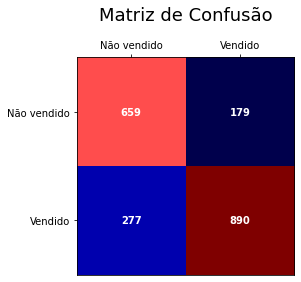

In [ ]:
real_0 = list(confusion_matrix[0].values())
real_1 = list(confusion_matrix[1].values())

matrix = [real_0, real_1]

col = ['Não vendido', 'Vendido']
row = ['Não vendido', 'Vendido']

fig, ax = plt.subplots()
im = ax.imshow(matrix, cmap=plt.cm.seismic)

ax.set_yticks(np.arange(len(col)))
ax.set_xticklabels(col)
ax.set_xticks(np.arange(len(row)))
ax.set_yticklabels(row)

ax.xaxis.tick_top()

for i in range(len(col)):
    for j in range(len(row)):
        text = ax.text(j, i, matrix[i][j], ha="center", va="center", color="w", fontweight=800)

ax.set_title("Matriz de Confusão", fontsize=18, pad=20)
plt.show()

##Acurácia, Complemento, Precisão e Cobertura

In [ ]:
acuracies= [round((confusion_matrix[0][0]/len(y_pred)), 2), 
            round((confusion_matrix[1][1]/len(y_pred)), 2)]

complement = [round(1 - acuracies[0], 2), round(1 - acuracies[1], 2)]

precision = [
          round((confusion_matrix[0][0]/(confusion_matrix[0][0] + confusion_matrix[0][1])), 2), 
          round((confusion_matrix[1][1]/(confusion_matrix[1][1] + confusion_matrix[1][0])), 2)]

recall = [round((confusion_matrix[0][0]/(confusion_matrix[0][0] +  confusion_matrix[1][0])), 2), 
          round((confusion_matrix[1][1]/(confusion_matrix[1][1] +  confusion_matrix[0][1])), 2)]

In [ ]:
metrics = pd.DataFrame({'Acuraccy': acuracies, 
                        'Complement': complement, 'Precision': precision, 'Recall': recall}, ['Não vendido', 'Vendido'])
metrics

,Acuraccy,Complement,Precision,Recall
Não vendido,0.33,0.67,0.79,0.70
Vendido,0.44,0.56,0.76,0.83
